In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

In [182]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_columns', 100)

In [183]:
df = pd.read_excel("data.xlsx", index_col='Serial_no')
df.head(3)

,Q_1,Q_2,Q_3,Q_4,Q_5,Q_6,Q_7,Drop_out,Q_8,Q_9,Q_10,Q_11,Q_12,Q_13,Q_14,Q_15,Q_16,Q_17,Q_18,Q_19,Q_20,Q_21,Q_22,Q_23,Q_24,Q_25,Q_26,Q_27,Q_28,Q_29,Q_30,Q_31,Q_32,Q_33,Q_34,Q_35_i,Q_35_ii,Q_35_iii,Q_35_iv,Q_35_v,Q_35_vi,Q_36,Q_37_i,Q_37_ii,Q_37_iii,Q_37_iv,Q_37_v,Q_37_vi,Q_37_vii,Q_37_viii,Q_37_ix,Q_37_x,Q_37_xi,Q_37_xii,Q_37_xiii,Q_37_xiv,Q_37_xv,Fat_Occu_Coded,Mot_Occu_coded,Income_Coded,Age_Coded
Serial_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Nasima Akter,Female,27,8,150000,Seniors,Dead,Yes,Primary,Less,Bad,Rural,No,Average,Business,Housewife,No,Neutral,7,6,No,Yes,No,No,No,No,Yes,Rural,Near,Good,No,Public,Not much,Good,Neutral,Yes,No,No,No,No,No,Yes,Strongly disagree,Strongly disagree,Strongly disagree,Strongly agree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly agree,Business,Housewife,Lower Middle Income,Adult
2,Nilufa,Female,26,10,115000,Dead,Dead,Yes,Primary,Very much,Good,Rural,No,Average,Business,Housewife,Yes,Supportive,8,7,No,No,No,No,Yes,Yes,No,Rural,Far,Good,No,Public,Not much,Good,Yes,No,No,No,No,No,Yes,Yes,Strongly disagree,Strongly disagree,Strongly disagree,Neutral,Disagree,Disagree,Strongly disagree,Strongly disagree,Strongly disagree,Disagree,Disagree,Disagree,Strongly agree,Strongly agree,Agree,Business,Housewife,Lower Middle Income,Adult
3,Runa Begum,Female,26,6,120000,Seniors,Adults,Yes,Primary,Very much,Good,Urban,No,Average,Business,Business,No,Neutral,4,4,No,Yes,No,No,Yes,Yes,Yes,Urban,Near,Good,No,Private,Very much,Good,Yes,No,No,No,No,No,Yes,Yes,Strongly disagree,Strongly disagree,Disagree,Disagree,Disagree,Strongly disagree,Disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly agree,Strongly agree,Neutral,Business,Business,Lower Middle Income,Adult


In [184]:
features = ["Income_Coded", "Q_8", "Q_9", "Fat_Occu_Coded", "Q_23", "Q_36"]

In [185]:
X = df[features]
y = df[['Drop_out']]
X.head(2)

,Income_Coded,Q_8,Q_9,Fat_Occu_Coded,Q_23,Q_36
Serial_no,,,,,,
1,Lower Middle Income,Primary,Less,Business,No,Yes
2,Lower Middle Income,Primary,Very much,Business,No,Yes


In [186]:
X_encoded = pd.get_dummies(X, drop_first=True)
y_encoded = pd.get_dummies(y, drop_first=True)
X_encoded.head(3)

,Income_Coded_Lower Middle Income,Income_Coded_Upper Middle Income,Q_8_Primary,Q_8_Secondary,Q_9_Neutral,Q_9_Very much,Fat_Occu_Coded_Farmer,Fat_Occu_Coded_Job,Fat_Occu_Coded_Others,Q_23_Yes,Q_36_Yes
Serial_no,,,,,,,,,,,
1,1,0,1,0,0,0,0,0,0,0,1
2,1,0,1,0,0,1,0,0,0,0,1
3,1,0,1,0,0,1,0,0,0,0,1


In [187]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size = 0.25, random_state = 0)

In [188]:
print(X_train.shape)
print(X_test.shape)

(157, 11)
(53, 11)


In [189]:
acc_dict = {
    'name': [],
    'accuracy': []
}

Decision Tree
Accuracy -> 86.79 %

              precision    recall  f1-score   support

           0       0.74      0.88      0.80        16
           1       0.94      0.86      0.90        37

    accuracy                           0.87        53
   macro avg       0.84      0.87      0.85        53
weighted avg       0.88      0.87      0.87        53



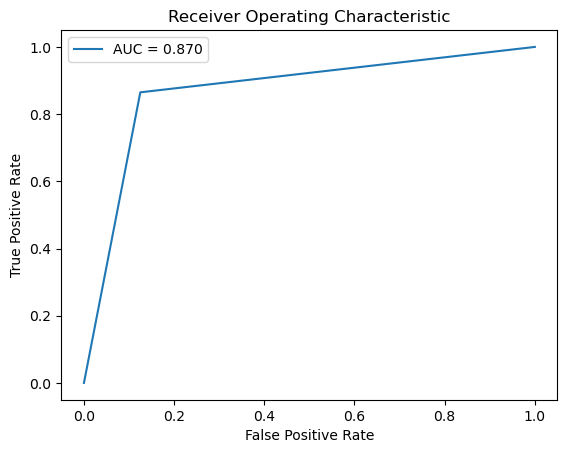

In [190]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
pred = dt.predict(X_test)
ac = accuracy_score(y_test, pred)
cr = classification_report(y_test, pred)
acc_dict['name'].append("Decision Tree")
acc_dict['accuracy'].append(ac)
print("Decision Tree")
print("Accuracy -> {:.2f} %\n".format(ac*100))
print(cr)

# calculate AUC score
auc = roc_auc_score(y_test, pred)

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred)

# plot ROC curve
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()


Support Vector Machine
Accuracy -> 86.79 %

              precision    recall  f1-score   support

           0       0.80      0.75      0.77        16
           1       0.89      0.92      0.91        37

    accuracy                           0.87        53
   macro avg       0.85      0.83      0.84        53
weighted avg       0.87      0.87      0.87        53



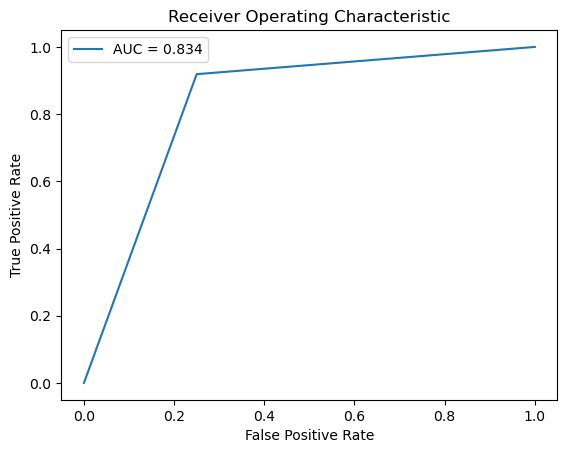

In [191]:
svm = SVC(kernel='rbf')
svm = svm.fit(X_train, y_train)
pred = svm.predict(X_test)
ac = accuracy_score(y_test, pred)
cr = classification_report(y_test, pred)
acc_dict['name'].append("SVM")
acc_dict['accuracy'].append(ac)
print("Support Vector Machine")
print("Accuracy -> {:.2f} %\n".format(ac*100))
print(cr)

# calculate AUC score
auc = roc_auc_score(y_test, pred)

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred)

# plot ROC curve
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

Random Forest
Accuracy -> 83.02 %

              precision    recall  f1-score   support

           0       0.71      0.75      0.73        16
           1       0.89      0.86      0.88        37

    accuracy                           0.83        53
   macro avg       0.80      0.81      0.80        53
weighted avg       0.83      0.83      0.83        53



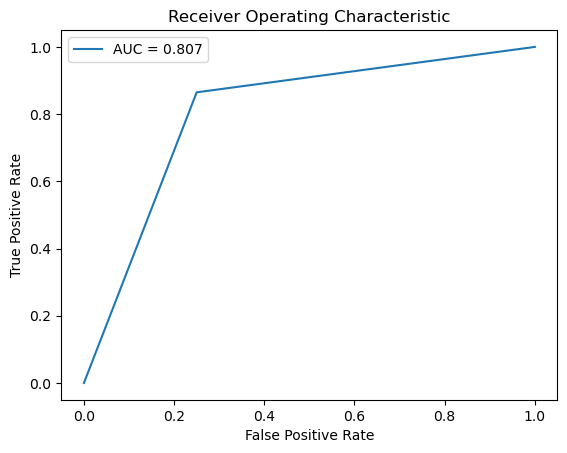

In [192]:
rf = RandomForestClassifier(n_estimators=100)
rf = rf.fit(X_train, y_train)
pred = rf.predict(X_test)
ac = accuracy_score(y_test, pred)
cr = classification_report(y_test, pred)
acc_dict['name'].append("Random Forest")
acc_dict['accuracy'].append(ac)
print("Random Forest")
print("Accuracy -> {:.2f} %\n".format(ac*100))
print(cr)

# calculate AUC score
auc = roc_auc_score(y_test, pred)

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred)

# plot ROC curve
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

XGB
Accuracy -> 81.13 %

              precision    recall  f1-score   support

           0       0.67      0.75      0.71        16
           1       0.89      0.84      0.86        37

    accuracy                           0.81        53
   macro avg       0.78      0.79      0.78        53
weighted avg       0.82      0.81      0.81        53



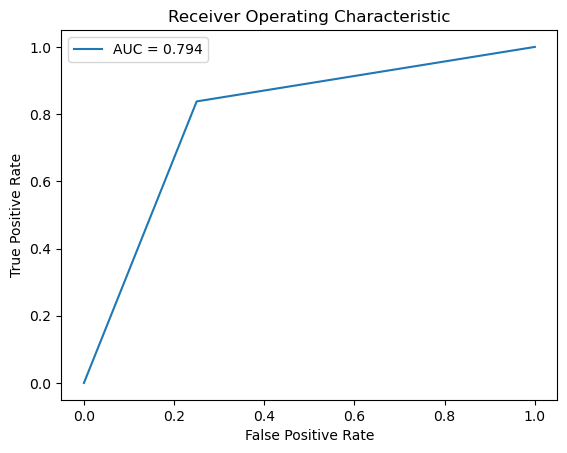

In [193]:
from xgboost import XGBClassifier


xgb = XGBClassifier()
xgb = xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
ac = accuracy_score(y_test, pred)
cr = classification_report(y_test, pred)
acc_dict['name'].append("XGB")
acc_dict['accuracy'].append(ac)
print("XGB")
print("Accuracy -> {:.2f} %\n".format(ac*100))
print(cr)

# calculate AUC score
auc = roc_auc_score(y_test, pred)

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred)

# plot ROC curve
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

LR
Accuracy -> 79.25 %

              precision    recall  f1-score   support

           0       0.69      0.56      0.62        16
           1       0.82      0.89      0.86        37

    accuracy                           0.79        53
   macro avg       0.76      0.73      0.74        53
weighted avg       0.78      0.79      0.79        53



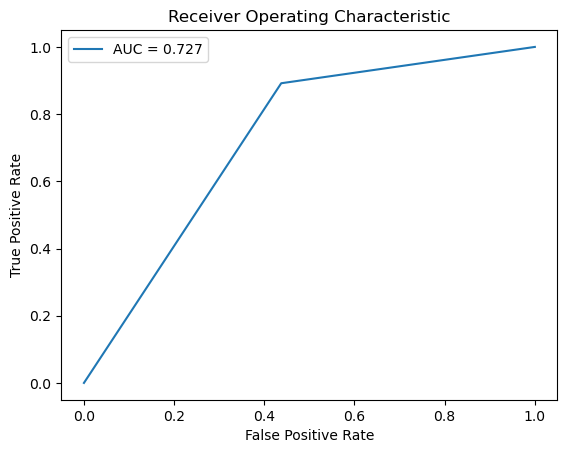

In [194]:
lr = LogisticRegression()
lr = lr.fit(X_train, y_train)
pred = lr.predict(X_test)
ac = accuracy_score(y_test, pred)
cr = classification_report(y_test, pred)
acc_dict['name'].append("LR")
acc_dict['accuracy'].append(ac)
print("LR")
print("Accuracy -> {:.2f} %\n".format(ac*100))
print(cr)

# calculate AUC score
auc = roc_auc_score(y_test, pred)

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred)

# plot ROC curve
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

In [195]:
adf = pd.DataFrame(acc_dict)
adf

,name,accuracy
0,Decision Tree,0.867925
1,SVM,0.867925
2,Random Forest,0.830189
3,XGB,0.811321
4,LR,0.792453
